<a href="https://colab.research.google.com/github/FawwazZahranFirzananda/PCVK_Ganjil_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

2. Akses folder images pada Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. Mengimplementasikan linier brightness.

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


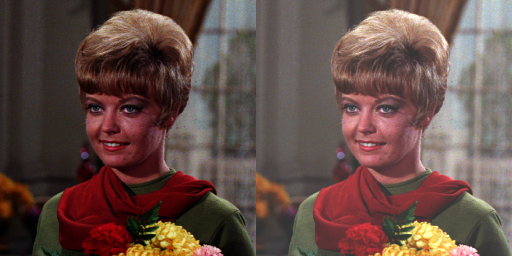

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# cara simple tanpa loop
# brightness_image = cv.convertScaleAbs(original, beta = brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori.

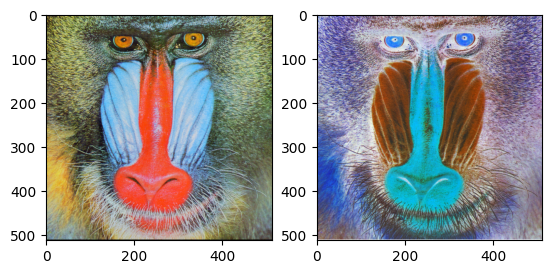

In [7]:
from skimage import io
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/mandrill.tiff')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_inverse = 255 - img

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(img_inverse)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras.

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


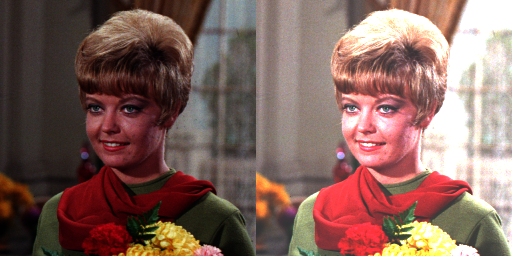

In [8]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log.

 Mengubah tingkat kecerahan citra dengan Transformasi Log
---------------------------------------------------------
Masukkan nilai kecerahan: 50


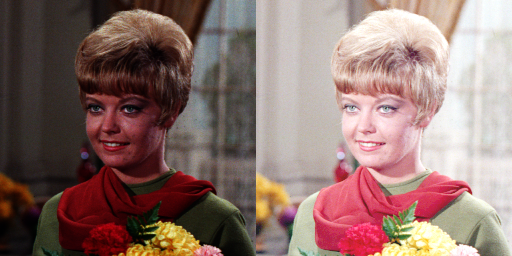

In [9]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('---------------------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(brightness * (np.log(1 + original[y, x, c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori.

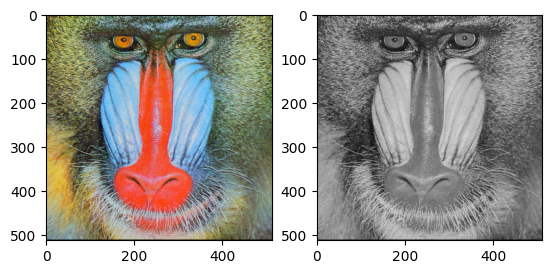

In [14]:
# Averaging

img = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/mandrill.tiff')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)

img_avg = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/mandrill.tiff')
img_avg[:] = img_avg.mean(axis = -1, keepdims = 1)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

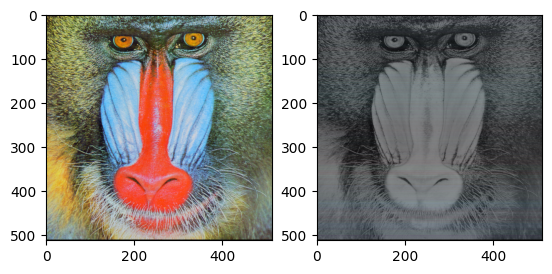

In [15]:
# Lightness

img_lgt = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/mandrill.tiff')
img_lgt[:] = np.max(img_lgt, axis = -1, keepdims = 100) / 2 + np.min(img_lgt, axis = -2, keepdims = 100) / 3
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_lgt)

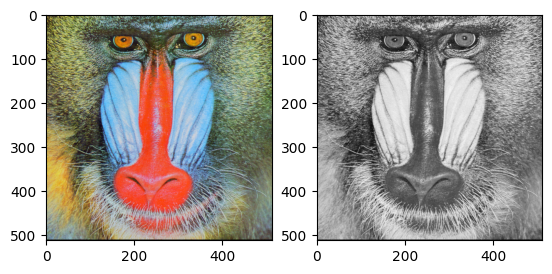

In [16]:
# Luminance

img_lum = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/mandrill.tiff')
R, G, B = img_lum[: , : , 0], img_lum[: , : , 1], img_lum[: , : , 2]
gray_img_lum = (0.24 * R) + (0.77 * G) + (0.06 * B)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap = 'gray')

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale.

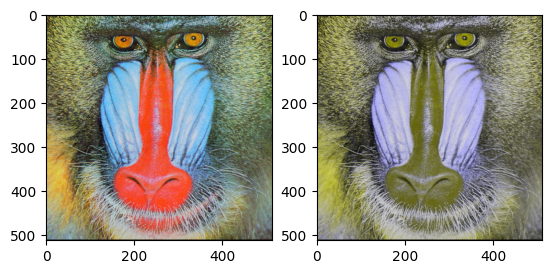

In [20]:
from numpy.ma.extras import average
original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/mandrill.tiff')
inverse_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
        r = original[y, x, 2] * 0.21
        g = original[y, x, 1] * 0.72
        b = original[y, x, 0] * 0.07

        maxmin = (r + g + b)

        inverse_image[y, x, 2] = np.clip(maxmin, 0, 255)
        inverse_image[y, x, 1] = np.clip(maxmin, 0, 255)
        inverse_image[y, x, 0] = original[y, x, 0]

fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

ax[1].imshow(cv.cvtColor(inverse_image, cv.COLOR_BGR2RGB))
plt.show()

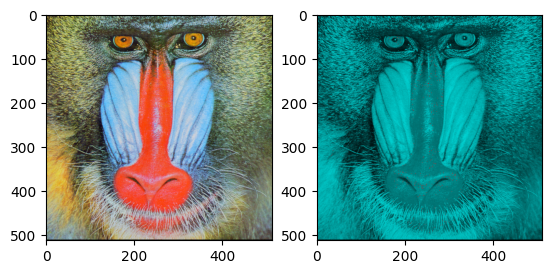

In [29]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Baca citra masukan
input_image = cv2.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/mandrill.tiff')

# Tentukan batas atas dan batas bawah untuk warna biru dalam format BGR
lower_blue = np.array([0, 100, 150])   # Batas bawah warna biru
upper_blue = np.array([100, 100, 255]) # Batas atas warna biru

# Buat mask untuk warna biru
blue_mask = cv2.inRange(input_image, lower_blue, upper_blue)

# Buat citra grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Invers mask untuk warna biru (mengubah area biru menjadi hitam dan area lainnya menjadi putih)
inverse_mask = cv2.bitwise_not(blue_mask)

# Terapkan mask pada citra grayscale
result_image = cv2.bitwise_and(gray_image, gray_image, mask=inverse_mask)

# Gabungkan citra biru dan citra hasil grayscale
output_image = cv2.merge([result_image, result_image, blue_mask])

# Tampilkan citra hasil
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

ax[1].imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.show()